# Image Processing

In [8]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import math

## Image load

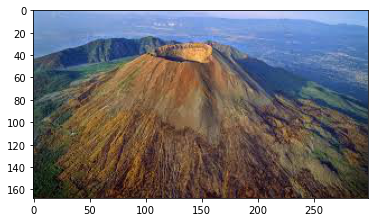

In [9]:
tacana = io.imread("tacana.jpg")
plt.imshow(tacana)

## Image scaling 

### Nearest neighbor

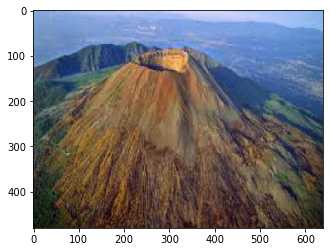

In [55]:
def nearestNeighbor(image, width, height):
    output = np.ndarray((height,width,3), np.uint8)
    source_height, source_width = image.shape[:2]
    
    width_ratio = source_width / width
    height_ratio = source_height / height
    
    
    for h in range(0,height):
        nearest_height = math.floor( h * height_ratio)
        
        for w in range(0,width):
            nearest_width = math.floor( w * width_ratio)
            output[h][w] = image[nearest_height][nearest_width]
    
    return output

thumbnail = nearestNeighbor(tacana, 640, 480)
plt.imshow(thumbnail, label="tacana")

### Linear interpolation

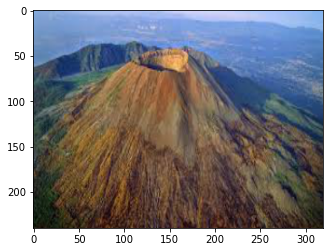

In [53]:
def _linearInterpolation(image, width, height):
    ratio = (image.shape[1] -1) / width
    output = np.ndarray((height,width,3),np.uint8)
    
    for y in range(image.shape[0]):
        for x in range(width):
            low = math.floor(x * ratio)
            high = math.ceil( x * ratio)
            weight = ratio * x - low
            
            a = image[y][low]
            b = image[y][high]
            #print(f'low: {low}, high: {high}')
            #print(a)
            output[y][x][0] = a[0] * (1-weight) + b[0] * weight
            output[y][x][1] = a[1] * (1-weight) + b[1] * weight
            output[y][x][2] = a[2] * (1-weight) + b[2] * weight
    return output

def linearInterpolation(image, width, height):
    width_ratio = (image.shape[1] - 1) / (width-1)
    height_ratio = (image.shape[0] - 1) / (height-1)
    
    output = np.ndarray((height,width,3),np.uint8)
    
    for y in range(height):
        y_low =  math.floor(y * height_ratio)
        y_high = math.ceil( y * height_ratio)
        wy = height_ratio * y - y_low
        
        for x in range(width):
            
            x_low = math.floor(x * width_ratio)    
            x_high = math.ceil( x * width_ratio)    
            wx = width_ratio * x - x_low
            
            a = image[y_low][x_low]
            b = image[y_low][x_high]
            c = image[y_high][x_low]
            d = image[y_high][x_high]
            
   
            output[y][x] = (1-wx)*(1-wy)*a + wx*(1-wy)*b + (1-wx)*wy*c + wx*wy*d 
            #output[y][x][0] = a[0]*(1-wx)*(1-wy) + b[0]*wx*(1-wy) + c[0]*(1-wx)*wy + d[0]*wx*wy;
            #output[y][x][1] = a[1]*(1-wx)*(1-wy) + b[1]*wx*(1-wy) + c[1]*(1-wx)*wy + d[1]*wx*wy;
            #output[y][x][2] = a[2]*(1-wx)*(1-wy) + b[2]*wx*(1-wy) + c[2]*(1-wx)*wy + d[2]*wx*wy;
            
            
    return output
#def rgbLinearInterpolation( a, b, l, L):
    #y = np.array((1,3),np.uint8)
    
    #y[0] = a[0] + l * (b[0] - a[0]) / L
    #y[1] = a[1] + l * (b[1] - a[1]) / L
    #y[2] = a[2] + l * (b[2] - a[2]) / L
    
    #return y

linears = linearInterpolation(tacana, 320, 240)
plt.imshow(linears)

## Gray scale

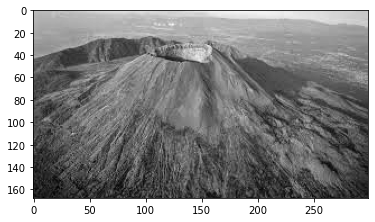

In [15]:
def grayScale(image):
    height, width = image.shape[:2]
    
    output = np.ndarray((height,width,1), np.uint8)
    
    for y in range(0,height):
        for x in range(0, width):
            r, g, b = image[y][x]
            output[y][x] = r * 0.21 + g * 0.72 + b * 0.07
    
    return output

gray = grayScale(tacana)
plt.imshow(gray, cmap = plt.cm.gray)